In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trans_df = pd.read_csv("train_transaction.csv")
iden_df = pd.read_csv("train_identity.csv")

In [3]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
iden_df

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [5]:
trans_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


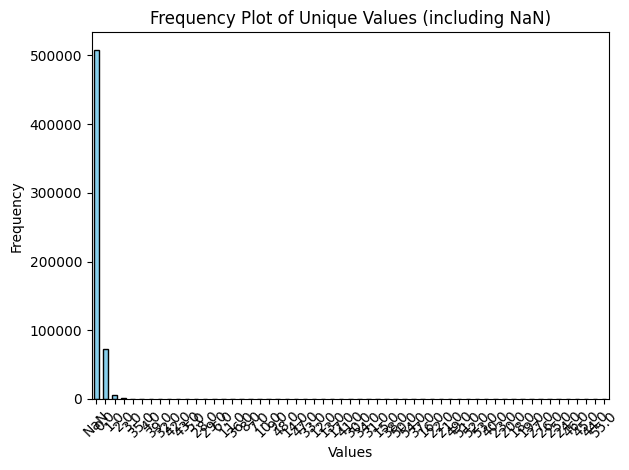

In [ ]:
value_counts = trans_df['V330'].value_counts(dropna=False)

value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Plot of Unique Values (including NaN)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

labels = [str(x) if pd.notna(x) else 'NaN' for x in value_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.tight_layout()
plt.show()

In [7]:
trans_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [8]:
for i in trans_df.columns:
    print(i)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [9]:
dic = {}
for i in trans_df.columns:
    dic[i]=int(trans_df[i].isna().sum())
dic

{'TransactionID': 0,
 'isFraud': 0,
 'TransactionDT': 0,
 'TransactionAmt': 0,
 'ProductCD': 0,
 'card1': 0,
 'card2': 8933,
 'card3': 1565,
 'card4': 1577,
 'card5': 4259,
 'card6': 1571,
 'addr1': 65706,
 'addr2': 65706,
 'dist1': 352271,
 'dist2': 552913,
 'P_emaildomain': 94456,
 'R_emaildomain': 453249,
 'C1': 0,
 'C2': 0,
 'C3': 0,
 'C4': 0,
 'C5': 0,
 'C6': 0,
 'C7': 0,
 'C8': 0,
 'C9': 0,
 'C10': 0,
 'C11': 0,
 'C12': 0,
 'C13': 0,
 'C14': 0,
 'D1': 1269,
 'D2': 280797,
 'D3': 262878,
 'D4': 168922,
 'D5': 309841,
 'D6': 517353,
 'D7': 551623,
 'D8': 515614,
 'D9': 515614,
 'D10': 76022,
 'D11': 279287,
 'D12': 525823,
 'D13': 528588,
 'D14': 528353,
 'D15': 89113,
 'M1': 271100,
 'M2': 271100,
 'M3': 271100,
 'M4': 281444,
 'M5': 350482,
 'M6': 169360,
 'M7': 346265,
 'M8': 346252,
 'M9': 346252,
 'V1': 279287,
 'V2': 279287,
 'V3': 279287,
 'V4': 279287,
 'V5': 279287,
 'V6': 279287,
 'V7': 279287,
 'V8': 279287,
 'V9': 279287,
 'V10': 279287,
 'V11': 279287,
 'V12': 76073,
 

In [10]:
trans_df[trans_df["isFraud"]==1]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590361,3577361,1,15807368,1224.000,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590372,3577372,1,15807758,117.000,W,14037,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
trans_df.select_dtypes(exclude=["number"])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,F,F,F,T
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,T,F,F,F
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN


In [12]:
trans_df.drop(columns=[
    'R_emaildomain',
    'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14',
    'M1', 'M2', 'M3', 'M4', 'M5', 'M7', 'M8', 'M9',
    *[f'V{i}' for i in range(1, 12)],
    *[f'V{i}' for i in range(138, 279)],
    *[f'V{i}' for i in range(322, 340)]
], inplace=True)

In [13]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [14]:
trans_df['V318'].value_counts(dropna=False)

V318
0.000000       535074
117.000000       1937
59.000000        1586
100.000000        991
226.000000        873
                ...  
9.713800            1
15.124600           1
44.019699           1
2408.969971         1
8.607200            1
Name: count, Length: 12310, dtype: int64

In [15]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [16]:
full_df = pd.merge(trans_df, iden_df, on='TransactionID', how='left')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


print("FEATURE ENGINEERING")

wild_df = full_df.copy()

if 'TransactionDT' in wild_df.columns:
    wild_df['sin_time'] = np.sin(wild_df['TransactionDT'] / (24*60*60))
    wild_df['cos_time'] = np.cos(wild_df['TransactionDT'] / (24*60*60))
    wild_df['tan_time'] = np.tan(wild_df['TransactionDT'] % (12*60*60) / (12*60*60) * np.pi)

numeric_cols = wild_df.select_dtypes(include=['number']).columns
for col in numeric_cols[:5]:  
    if wild_df[col].nunique() > 5:  
        wild_df[f'log_{col}'] = np.log1p(np.abs(wild_df[col]))
        wild_df[f'sqrt_{col}'] = np.sqrt(np.abs(wild_df[col]))
        wild_df[f'sin_{col}'] = np.sin(wild_df[col])
        wild_df[f'frac_{col}'] = wild_df[col] - np.floor(wild_df[col])

print("APPLYING TRANSFORMATIONS")

for col in numeric_cols[:3]:
    if wild_df[col].nunique() > 10:
        pt = PowerTransformer(method='box-cox')
        try:
            positive_vals = wild_df[col] - wild_df[col].min() + 0.01
            wild_df[f'boxcox_{col}'] = pt.fit_transform(positive_vals.values.reshape(-1, 1)).flatten()
        except:
            wild_df[f'boxcox_{col}'] = wild_df[col]
        wild_df[f'rank_gauss_{col}'] = stats.norm.ppf((stats.rankdata(wild_df[col]) - 0.5) / len(wild_df[col]))

for col in wild_df.columns:
    if wild_df[col].isna().sum() > 0:
        if wild_df[col].dtype in ['float64', 'int64']:
            wild_df[col] = wild_df[col].fillna(-1 * wild_df[col].median())
        else:
            wild_df[col] = wild_df[col].fillna('QUANTUM_VOID')

numeric_data = wild_df.select_dtypes(include=['number']).dropna(axis=1)
if numeric_data.shape[1] >= 5:
    ica = FastICA(n_components=5, random_state=42)
    try:
        ica_features = ica.fit_transform(numeric_data.fillna(0))
        for i in range(5):
            wild_df[f'ica_dim_{i}'] = ica_features[:, i]
    except:
        print("ICA transformation failed, skipping this step")

if numeric_data.shape[1] >= 3:
    grp = GaussianRandomProjection(n_components=3, eps=0.5)
    try:
        grp_features = grp.fit_transform(numeric_data.fillna(0))
        for i in range(3):
            wild_df[f'random_proj_{i}'] = grp_features[:, i]
    except:
        print("Random projection failed, skipping this step")

cat_cols = wild_df.select_dtypes(exclude=['number']).columns
for col in cat_cols:
    value_counts = wild_df[col].value_counts(normalize=True)
    mapping = {val: (freq + np.random.normal(0, 0.01)) for val, freq in value_counts.items()}
    wild_df[f'prob_{col}'] = wild_df[col].map(mapping)

print("CREATING META-FEATURES")

if 'isFraud' in wild_df.columns:
    fraud_corr = {}
    for col in numeric_cols:
        if col != 'isFraud':
            try:
                fraud_corr[col] = wild_df[[col, 'isFraud']].corr().iloc[0, 1]
            except:
                fraud_corr[col] = 0
    
    top_pos = sorted(fraud_corr.items(), key=lambda x: x[1], reverse=True)[:2]
    top_neg = sorted(fraud_corr.items(), key=lambda x: x[1])[:2]
    
    for i, (col1, _) in enumerate(top_pos):
        for j, (col2, _) in enumerate(top_neg):
            wild_df[f'interact_{i}_{j}'] = wild_df[col1] * wild_df[col2]

print("STATISTICAL ANOMALIES")

qt = QuantileTransformer(output_distribution='normal')
for col in numeric_cols[:5]:
    if wild_df[col].nunique() > 10:
        try:
            wild_df[f'quantile_{col}'] = qt.fit_transform(wild_df[col].values.reshape(-1, 1)).flatten()
            wild_df[f'anomaly_{col}'] = (np.abs(wild_df[f'quantile_{col}']) > 2.5).astype(int)
        except:
            pass

anomaly_cols = [c for c in wild_df.columns if c.startswith('anomaly_')]
if anomaly_cols:
    wild_df['total_anomalies'] = wild_df[anomaly_cols].sum(axis=1)

try:
    wild_df['feature_entropy'] = wild_df[numeric_cols].apply(lambda x: np.log(np.abs(x) + 1), axis=0).mean(axis=1)
except:
    print("Feature entropy calculation failed")
    

numeric_sample = list(numeric_cols[:3])
if len(numeric_sample) >= 2:
    try:
        wild_df['poly_combo_1'] = wild_df[numeric_sample[0]]**2 * np.sin(wild_df[numeric_sample[1]])
        wild_df['bizarro_ratio'] = wild_df[numeric_sample[0]] / (wild_df[numeric_sample[1]] + 1e-5)
    except:
        pass

print(f"Original shape: {trans_df.shape}")
print(f"Crazy preprocessed shape: {wild_df.shape}")
print(f"Added {wild_df.shape[1] - trans_df.shape[1]} new features!")

new_features = [c for c in wild_df.columns if c not in trans_df.columns]
print("\nSample of new crazy features:")
wild_df[new_features].head()

🌪️ UNLEASHING CHAOTIC FEATURE ENGINEERING 🌪️
👽 APPLYING BIZARRE TRANSFORMATIONS 👽
🔮 ENTERING QUANTUM FEATURE SPACE 🔮
🎲 PROBABILISTIC ENCODING IN PROGRESS 🎲
🧠 CREATING META-FEATURES 🧠
👀 DETECTING STATISTICAL ANOMALIES 👀
🧬 ADDING WILD POLYNOMIAL COMBINATIONS 🧬
Original shape: (590540, 203)
Crazy preprocessed shape: (590540, 312)
Added 109 new features!

Sample of new crazy features:


,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,5.0,-125800.5,-0.0,-0.0,-0.0,-0.0,-14.0,34.0,-0.0,-0.0,...,-5.199338,1,0.007527,0,0.637611,0,2,1.005391,0.0,2.987000e+11
1,5.0,-125800.5,-0.0,-0.0,-0.0,-0.0,-14.0,34.0,-0.0,-0.0,...,-5.199338,1,-1.171890,0,-1.378114,0,2,0.848203,0.0,2.987001e+11
2,5.0,-125800.5,-0.0,-0.0,-0.0,-0.0,-14.0,34.0,-0.0,-0.0,...,-5.199338,1,-0.118204,0,-0.893908,0,2,0.925773,0.0,2.987002e+11
3,5.0,-125800.5,-0.0,-0.0,-0.0,-0.0,-14.0,34.0,-0.0,-0.0,...,-5.199338,1,-0.426601,0,2.096521,0,2,1.544308,0.0,2.987003e+11
4,0.0,70787.0,-0.0,-0.0,-0.0,-0.0,-14.0,34.0,-0.0,-0.0,...,-5.199338,1,-0.426601,0,-0.915582,0,2,0.914892,0.0,2.987004e+11


In [18]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [19]:
wild_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,2987000,0,86400,68.50,W,13926,-361.0,150.0,discover,142.0,...,-5.199338,1,0.007527,0,0.637611,0,2,1.005391,0.0,2.987000e+11
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,-5.199338,1,-1.171890,0,-1.378114,0,2,0.848203,0.0,2.987001e+11
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,-5.199338,1,-0.118204,0,-0.893908,0,2,0.925773,0.0,2.987002e+11
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,-5.199338,1,-0.426601,0,2.096521,0,2,1.544308,0.0,2.987003e+11
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,-5.199338,1,-0.426601,0,-0.915582,0,2,0.914892,0.0,2.987004e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,-361.0,150.0,visa,226.0,...,5.199338,1,-0.504922,0,-0.589456,0,2,1.120338,0.0,3.577535e+11
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,5.199338,1,-0.724973,0,0.086595,0,2,0.906385,0.0,3.577536e+11
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,5.199338,1,-1.029375,0,0.313694,0,2,0.938681,0.0,3.577537e+11
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,5.199338,1,0.587964,0,-0.376283,0,2,1.496558,0.0,3.577538e+11


🧪 FINAL PREPROCESSING AND TRAIN-TEST SPLITTING 🧪
Target variable 'isFraud' separated. Shape of X: (590540, 311), Shape of y: (590540,)
Categorical features: 22
Numerical features: 289
🔍 PERFORMING ADVANCED IMPUTATION
🏷️ ENCODING CATEGORICAL VARIABLES
After encoding: 311 total features
📏 SCALING NUMERICAL FEATURES
🧹 FINAL CLEANUP
✂️ PERFORMING TRAIN-TEST SPLIT
Train set: 472432 samples
Test set: 118108 samples
Fraud cases in train set: 3.50%
Fraud cases in test set: 3.50%


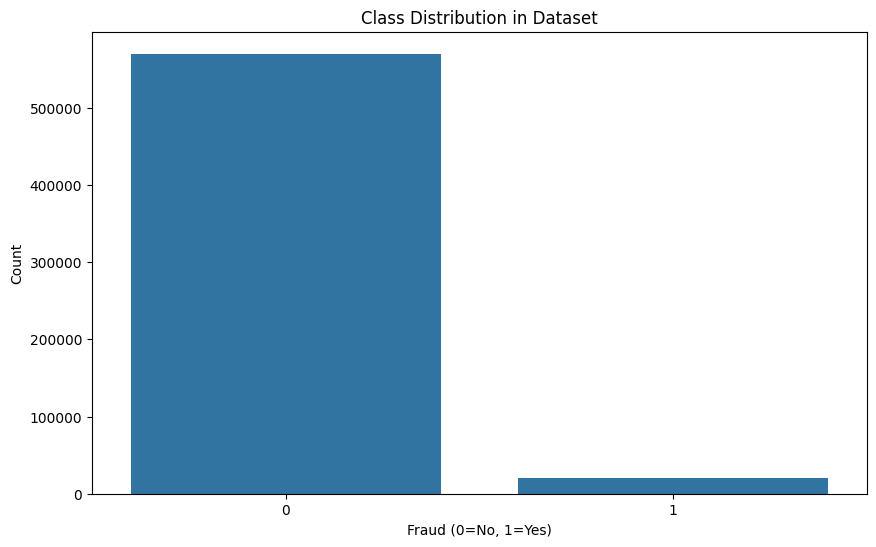

✅ PREPROCESSING COMPLETE!
🏆 CALCULATING INITIAL FEATURE IMPORTANCE


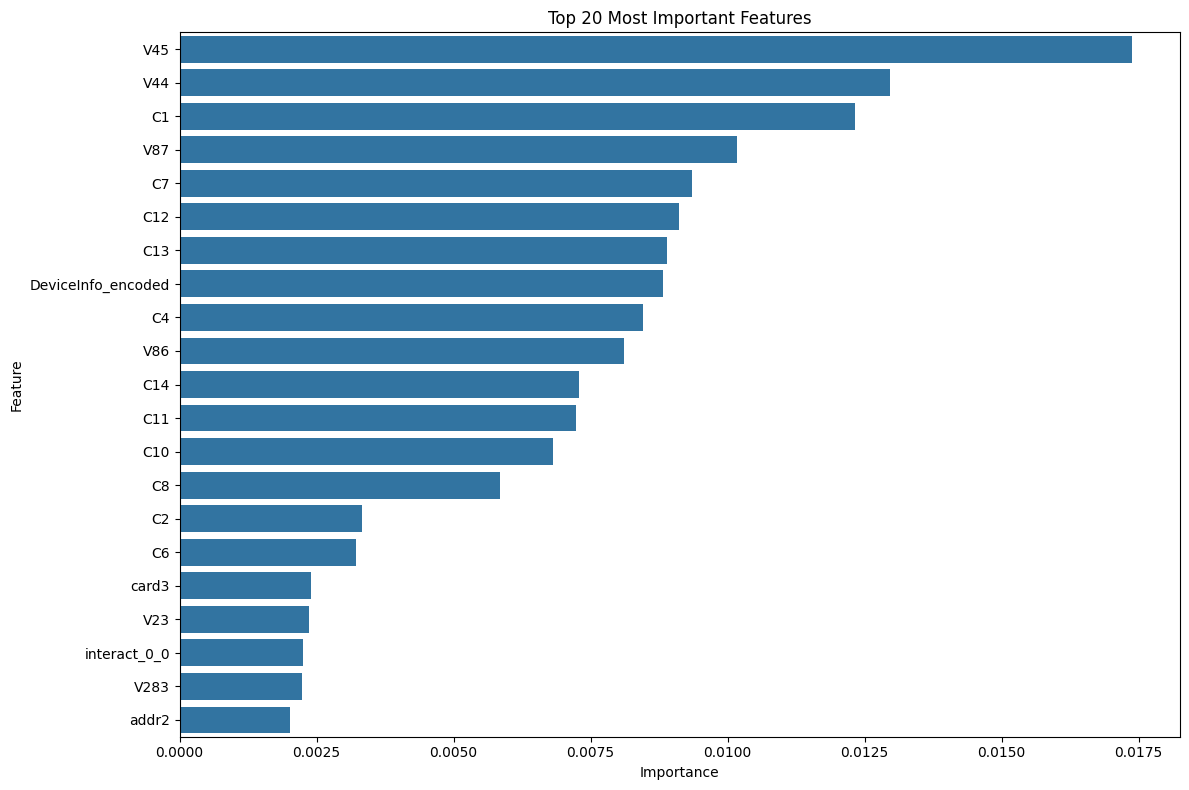

{'X_train':         TransactionID  TransactionDT  TransactionAmt     card1     card2  \
 40809       -1.492663      -1.378280       -0.146458 -0.759357  0.263595   
 285886      -0.055044      -0.078857       -0.439188 -0.407808 -0.036769   
 104256      -1.120483      -1.148048       -0.113217  0.365477 -1.338344   
 507860       1.247054       1.283768        0.447072 -1.485919 -0.136890   
 196382      -0.580073      -0.641085       -0.075376  0.791907 -0.298196   
 ...               ...            ...             ...       ...       ...   
 324259       0.170052       0.140193       -0.317889  0.121250  0.575083   
 532790       1.393293       1.445613       -0.477183 -0.878104  1.075689   
 29747       -1.557552      -1.433225        1.107920 -0.115021  0.118975   
 573130       1.629927       1.698615       -0.496203 -1.376149  0.313655   
 337290       0.246492       0.199497        0.380381 -1.112538  1.131311   
 
            card3     card5     addr1     addr2     dist1  ... 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

print("FINAL PREPROCESSING AND TRAIN-TEST SPLITTING")

if 'isFraud' in wild_df.columns:
    X = wild_df.drop('isFraud', axis=1)
    y = wild_df['isFraud']
    print(f"Target variable 'isFraud' separated. Shape of X: {X.shape}, Shape of y: {y.shape}")
else:
    X = wild_df
    y = None
    print("No target variable found. Preprocessing only features.")

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical features: {len(cat_cols)}")
print(f"Numerical features: {len(num_cols)}")

print("PERFORMING ADVANCED IMPUTATION")

num_imputer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5, weights='distance')),  
])

cat_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
])

print(" ENCODING CATEGORICAL VARIABLES")

if cat_cols:
    if y is not None:
        cat_encoder = ce.TargetEncoder()
        
        for col in cat_cols:
            if X[col].nunique() > 1:  
                try:
                    X[f"{col}_encoded"] = cat_encoder.fit_transform(X[col], y)
                except:
                    print(f"Could not target encode {col}, using one-hot instead")
                    dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                    X = pd.concat([X, dummies], axis=1)
    else:
        for col in cat_cols:
            if X[col].nunique() <= 30:  
                dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                X = pd.concat([X, dummies], axis=1)
            else:
                freq = X[col].value_counts(normalize=True)
                X[f"{col}_freq"] = X[col].map(freq)

    X = X.drop(columns=cat_cols)
    
    num_cols = X.select_dtypes(include=['number']).columns.tolist()
    print(f"After encoding: {X.shape[1]} total features")

print("SCALING NUMERICAL FEATURES")

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("FINAL CLEANUP")

missing_percentage = X.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > 0.8].index
X = X.drop(columns=cols_to_drop, errors='ignore')

print("TRAIN-TEST SPLIT")

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    train_fraud_percent = y_train.mean() * 100
    test_fraud_percent = y_test.mean() * 100
    
    print(f"Fraud cases in train set: {train_fraud_percent:.2f}%")
    print(f"Fraud cases in test set: {test_fraud_percent:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y)
    plt.title('Class Distribution in Dataset')
    plt.xlabel('Fraud (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.show()
    
    print("PREPROCESSING COMPLETE!")
    preprocessed_data = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'feature_names': X.columns.tolist()
    }
else:
    print("PREPROCESSING COMPLETE (no target variable)!")
    preprocessed_data = {
        'X': X,
        'feature_names': X.columns.tolist()
    }

if y is not None:
    from sklearn.ensemble import RandomForestClassifier
    
    print("CALCULATING INITIAL FEATURE IMPORTANCE")
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    importances = rf.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.iloc[2:23])
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    preprocessed_data['feature_importance'] = feature_importance

preprocessed_data

In [21]:
wild_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,2987000,0,86400,68.50,W,13926,-361.0,150.0,discover,142.0,...,-5.199338,1,0.007527,0,0.637611,0,2,1.005391,0.0,2.987000e+11
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,-5.199338,1,-1.171890,0,-1.378114,0,2,0.848203,0.0,2.987001e+11
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,-5.199338,1,-0.118204,0,-0.893908,0,2,0.925773,0.0,2.987002e+11
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,-5.199338,1,-0.426601,0,2.096521,0,2,1.544308,0.0,2.987003e+11
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,-5.199338,1,-0.426601,0,-0.915582,0,2,0.914892,0.0,2.987004e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,-361.0,150.0,visa,226.0,...,5.199338,1,-0.504922,0,-0.589456,0,2,1.120338,0.0,3.577535e+11
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,5.199338,1,-0.724973,0,0.086595,0,2,0.906385,0.0,3.577536e+11
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,5.199338,1,-1.029375,0,0.313694,0,2,0.938681,0.0,3.577537e+11
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,5.199338,1,0.587964,0,-0.376283,0,2,1.496558,0.0,3.577538e+11


In [22]:
X_train

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_30_encoded,id_31_encoded,id_33_encoded,id_34_encoded,id_35_encoded,id_36_encoded,id_37_encoded,id_38_encoded,DeviceType_encoded,DeviceInfo_encoded
40809,-1.492663,-1.378280,-0.146458,-0.759357,0.263595,-0.124132,-0.845993,0.186234,0.357091,-0.208987,...,-0.168585,-0.457097,-0.382079,0.811041,0.309254,1.841878,1.916191,0.920644,1.142959,-0.520767
285886,-0.055044,-0.078857,-0.439188,-0.407808,-0.036769,-0.124132,0.508716,-0.393316,0.357091,-0.159853,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
104256,-1.120483,-1.148048,-0.113217,0.365477,-1.338344,-0.124132,0.545330,-0.163412,0.357091,-0.208987,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
507860,1.247054,1.283768,0.447072,-1.485919,-0.136890,-0.124132,-1.724723,0.502353,0.357091,-0.163947,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
196382,-0.580073,-0.641085,-0.075376,0.791907,-0.298196,-0.124132,0.545330,1.034006,0.357091,-0.155758,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324259,0.170052,0.140193,-0.317889,0.121250,0.575083,-0.124132,-1.285358,-0.489109,0.357091,-0.208987,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
532790,1.393293,1.445613,-0.477183,-0.878104,1.075689,1.692619,-1.065676,-2.510351,-2.823197,-0.208987,...,-0.117146,1.713786,-0.096985,-0.280386,2.795168,1.841878,1.916191,2.355035,1.142959,-0.211367
29747,-1.557552,-1.433225,1.107920,-0.115021,0.118975,-0.124132,0.545330,-0.230467,0.357091,-0.208987,...,-0.117146,-0.407157,-0.096985,-0.280386,-0.446303,-0.549450,-0.554736,-0.524585,-0.528395,-0.211367
573130,1.629927,1.698615,-0.496203,-1.376149,0.313655,1.692619,0.508716,-2.510351,-2.823197,-0.208987,...,-0.117146,1.713786,-0.096985,-0.280386,2.795168,1.841878,1.916191,2.355035,1.142959,-0.211367


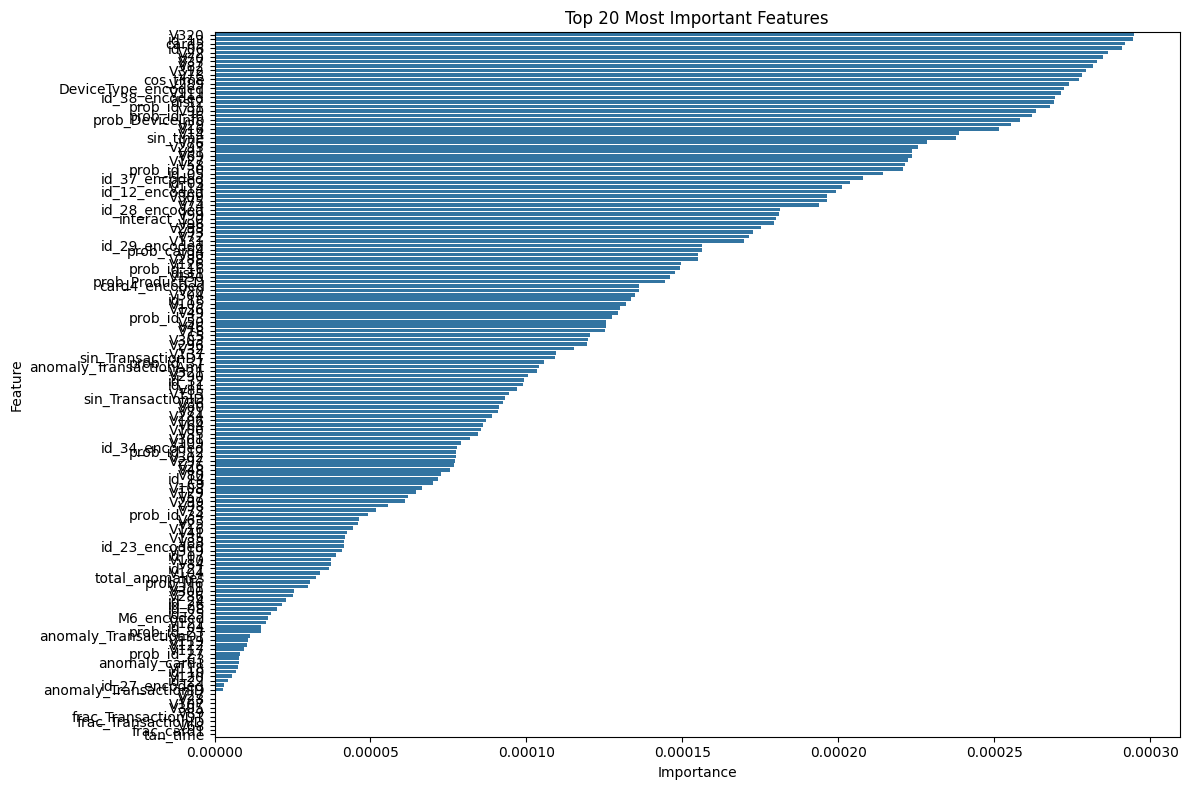

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.iloc[154:])
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

In [24]:
preprocessed_data['feature_importance']

,Feature,Importance
288,bizarro_ratio,0.406021
287,poly_combo_1,0.328978
61,V45,0.017388
60,V44,0.012968
11,C1,0.012334
...,...,...
230,frac_TransactionDT,0.000000
226,frac_TransactionID,0.000000
84,V68,0.000000
238,frac_card1,0.000000


In [25]:
feature_importance_df= pd.DataFrame(feature_importance)

In [26]:
feature_importance_df

,Feature,Importance
288,bizarro_ratio,0.406021
287,poly_combo_1,0.328978
61,V45,0.017388
60,V44,0.012968
11,C1,0.012334
...,...,...
230,frac_TransactionDT,0.000000
226,frac_TransactionID,0.000000
84,V68,0.000000
238,frac_card1,0.000000


Number of features with importance < 0.001: 260
Current number of features: 311
Features after removal: 51
Removed 260 features
Total importance of removed features: 0.077399 (7.7399% of total)


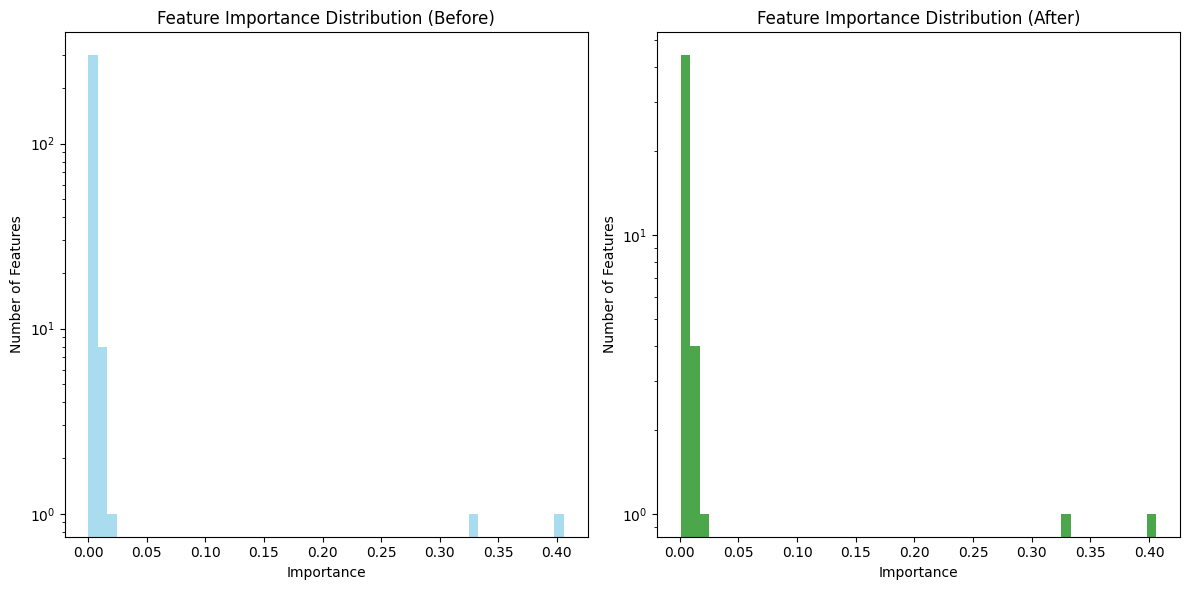

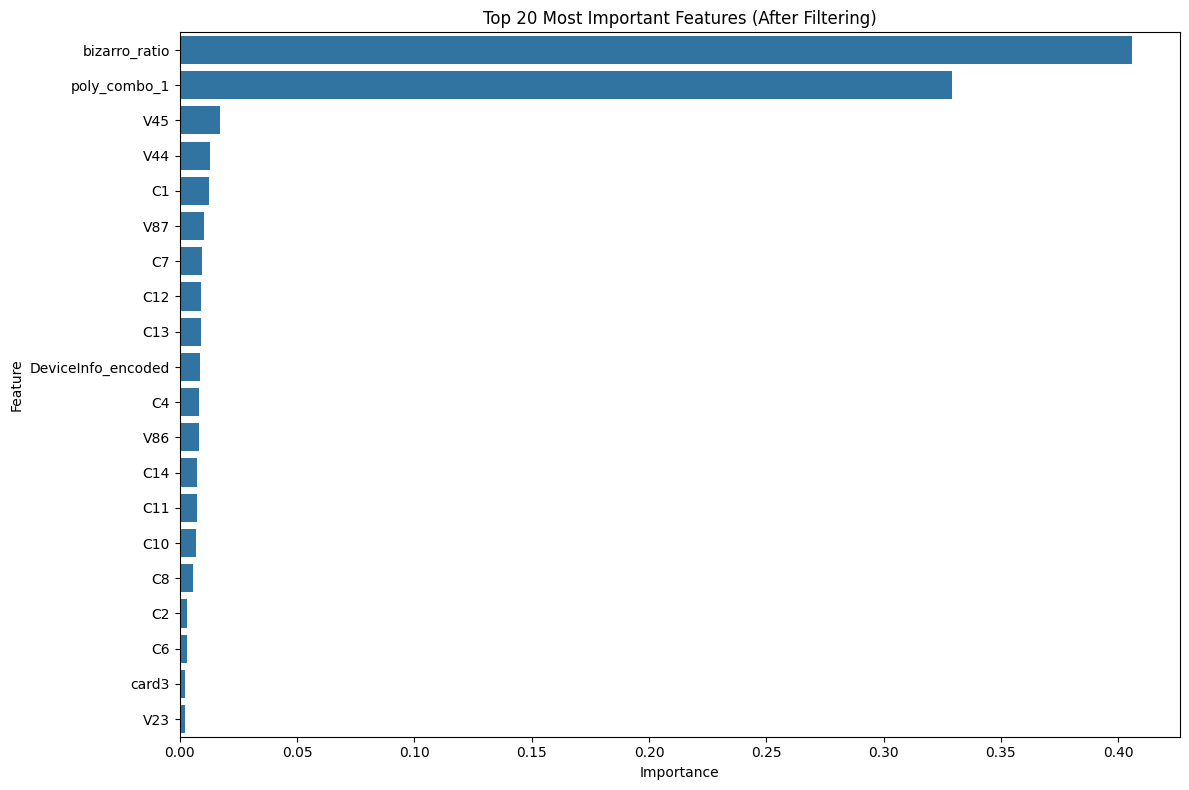


Model building can now proceed with the filtered features for better efficiency.


In [ ]:
threshold = 0.001

low_importance_features = feature_importance_df[feature_importance_df['Importance'] <= threshold]['Feature'].tolist()

print(f"Number of features with importance < {threshold}: {len(low_importance_features)}")
print(f"Current number of features: {X_train.shape[1]}")

X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

print(f"Features after removal: {X_train_filtered.shape[1]}")
print(f"Removed {len(low_importance_features)} features")

removed_importance = feature_importance_df[feature_importance_df['Importance'] <= threshold]['Importance'].sum()
total_importance = feature_importance_df['Importance'].sum()
print(f"Total importance of removed features: {removed_importance:.6f} ({removed_importance/total_importance:.4%} of total)")

plt.figure(figsize=(12, 6))

plt.hist(feature_importance_df['Importance'], bins=50, color='skyblue', alpha=0.7)
plt.title('Feature Importance Distribution (Before)')
plt.xlabel('Importance')
plt.ylabel('Number of Features')
plt.yscale('log')  

plt.subplot(1, 2, 2)
remaining_importance = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Importance']
plt.hist(remaining_importance, bins=50, color='green', alpha=0.7)
plt.title('Feature Importance Distribution (After)')
plt.xlabel('Importance')
plt.ylabel('Number of Features')
plt.yscale('log')  

plt.tight_layout()
plt.show()
preprocessed_data['X_train_filtered'] = X_train_filtered
preprocessed_data['X_test_filtered'] = X_test_filtered
preprocessed_data['removed_features'] = low_importance_features
remaining_importance_df = feature_importance_df[~feature_importance_df['Feature'].isin(low_importance_features)]
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=remaining_importance_df.head(20))
plt.title('Top 20 Most Important Features (After Filtering)')
plt.tight_layout()
plt.show()

print("\nModel building can now proceed with the filtered features for better efficiency.")

In [28]:
X_train_filtered

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio,ProductCD_encoded,P_emaildomain_encoded,id_31_encoded,DeviceInfo_encoded
40809,-0.146458,0.263595,-0.124132,0.186234,0.357091,-0.098020,-0.092260,-0.030388,-0.112869,-0.046146,...,-0.004319,0.259592,0.172831,-0.743622,-0.189476,-0.222341,0.091659,-0.810245,-0.457097,-0.520767
285886,-0.439188,-0.036769,-0.124132,-0.393316,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,-0.774269,0.259592,0.172831,-1.078347,-0.189476,0.169196,-0.471579,0.588442,-0.407157,-0.211367
104256,-0.113217,-1.338344,-0.124132,-0.163412,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,0.062044,0.259592,0.172831,0.103939,-0.189476,-0.120978,-0.471579,-0.261823,-0.407157,-0.211367
507860,0.447072,-0.136890,-0.124132,0.502353,0.357091,-0.098020,-0.085795,-0.059438,-0.112869,-0.046146,...,0.941122,0.259592,0.172831,-0.642030,-0.189476,0.523823,-0.471579,-0.375308,-0.407157,-0.211367
196382,-0.075376,-0.298196,-0.124132,1.034006,0.357091,-0.098020,-0.092260,-0.059438,-0.126853,-0.046146,...,0.134679,0.259592,0.172831,0.980359,-0.189476,0.026204,-0.471579,-0.375308,-0.407157,-0.211367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324259,-0.317889,0.575083,-0.124132,-0.489109,0.357091,-0.090533,-0.085795,-0.059438,-0.084900,-0.046146,...,-0.398997,0.259592,0.172831,-0.576048,-0.189476,0.230501,-0.471579,0.588442,-0.407157,-0.211367
532790,-0.477183,1.075689,1.692619,-2.510351,-2.823197,-0.090533,-0.085795,-0.044913,-0.112869,-0.029946,...,-0.928191,-2.343987,-0.443191,-0.496515,-0.189476,0.563652,2.646506,1.235913,1.713786,-0.211367
29747,1.107920,0.118975,-0.124132,-0.230467,0.357091,-0.083047,-0.072864,-0.059438,-0.042947,-0.046146,...,1.697724,0.259592,0.172831,1.330210,-0.189476,-0.240014,-0.471579,-0.375308,-0.407157,-0.211367
573130,-0.496203,0.313655,1.692619,-2.510351,-2.823197,0.044228,0.088772,-0.001339,-0.070916,0.018655,...,-1.018054,-2.343987,-0.443191,-0.141752,6.117119,-5.059536,2.646506,1.235913,1.713786,-0.211367


In [29]:
New_X_Train= X_train_filtered
New_X_Train.to_csv("X_train.csv", index=False)


In [30]:
New_X_Train.head(5000).to_csv("X_train_for_gpt.csv",index=False)

In [31]:
wild_df.head(5000).to_csv("real_for_gpt.csv",index=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_csv('real_for_gpt.csv')

df = df.drop(columns=['TransactionID'])
categorical = df.select_dtypes(include='object').columns
for col in categorical:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['isFraud']).values
y = df['isFraud'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

fraud_data = X[y == 1]

required_synthetic_samples = 250000
print(f"Generating {required_synthetic_samples} synthetic fraud samples.")

class FraudDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

dataset = FraudDataset(fraud_data)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

input_dim = fraud_data.shape[1]

def get_generator():
    return nn.Sequential(
        nn.Linear(100, 128),
        nn.ReLU(),
        nn.Linear(128, 256),
        nn.ReLU(),
        nn.Linear(256, input_dim)
    )

def get_discriminator():
    return nn.Sequential(
        nn.Linear(input_dim, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 128),
        nn.LeakyReLU(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

G1, G2 = get_generator(), get_generator()
D1, D2 = get_discriminator(), get_discriminator()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G1, G2, D1, D2 = G1.to(device), G2.to(device), D1.to(device), D2.to(device)

loss_fn = nn.BCELoss()
opt_D1 = optim.Adam(D1.parameters(), lr=2e-4)
opt_G1 = optim.Adam(G1.parameters(), lr=2e-4)
opt_D2 = optim.Adam(D2.parameters(), lr=2e-4)
opt_G2 = optim.Adam(G2.parameters(), lr=2e-4)

epochs = 200
for epoch in range(epochs):
    for real_data in dataloader:
        real_data = real_data.to(device)
        batch_size = real_data.size(0)

        z = torch.randn(batch_size, 100).to(device)
        fake_data = G1(z)
        D1_real = D1(real_data)
        D1_fake = D1(fake_data.detach())

        D1_loss = loss_fn(D1_real, torch.ones_like(D1_real)) + \
                  loss_fn(D1_fake, torch.zeros_like(D1_fake))

        opt_D1.zero_grad()
        D1_loss.backward()
        opt_D1.step()

        G1_loss = loss_fn(D1(fake_data), torch.ones_like(D1_fake))
        opt_G1.zero_grad()
        G1_loss.backward()
        opt_G1.step()

        z = torch.randn(batch_size, 100).to(device)
        fake_data = G2(z)
        D2_real = D2(real_data)
        D2_fake = D2(fake_data.detach())

        D2_loss = loss_fn(D2_real, torch.ones_like(D2_real)) + \
                  loss_fn(D2_fake, torch.zeros_like(D2_fake))

        opt_D2.zero_grad()
        D2_loss.backward()
        opt_D2.step()

        G2_loss = loss_fn(D2(fake_data), torch.ones_like(D2_fake))
        opt_G2.zero_grad()
        G2_loss.backward()
        opt_G2.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | D1 Loss: {D1_loss.item():.4f} | G1 Loss: {G1_loss.item():.4f} | D2 Loss: {D2_loss.item():.4f} | G2 Loss: {G2_loss.item():.4f}")

def diffusion_refinement(synthetic_data, steps=5, alpha=0.02):
    data = synthetic_data.clone()
    for _ in range(steps):
        noise = torch.randn_like(data)
        data = data + alpha * noise
        data = torch.clamp(data, -3, 3)  
    return data

G_final = G1 if G1_loss.item() < G2_loss.item() else G2
G_final.eval()

with torch.no_grad():
    z = torch.randn(required_synthetic_samples, 100).to(device)
    synthetic = G_final(z)
    synthetic_refined = diffusion_refinement(synthetic)

synthetic_np = synthetic_refined.cpu().numpy()
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_np), columns=df.columns.drop('isFraud'))
synthetic_df['isFraud'] = 1
synthetic_df.to_csv('synthetic_fraud_duogan.csv', index=False)
print("Synthetic fraud data saved as 'synthetic_fraud_duogan.csv'")


Generating 250000 synthetic fraud samples.
Epoch 0 | D1 Loss: 1.3576 | G1 Loss: 0.6905 | D2 Loss: 1.2861 | G2 Loss: 0.6409
Epoch 10 | D1 Loss: 1.0863 | G1 Loss: 0.6155 | D2 Loss: 1.0344 | G2 Loss: 0.6052
Epoch 20 | D1 Loss: 0.8033 | G1 Loss: 0.7734 | D2 Loss: 0.7568 | G2 Loss: 0.7604
Epoch 30 | D1 Loss: 0.7679 | G1 Loss: 0.7902 | D2 Loss: 0.8485 | G2 Loss: 0.6766
Epoch 40 | D1 Loss: 0.7908 | G1 Loss: 0.8185 | D2 Loss: 0.7438 | G2 Loss: 0.8756
Epoch 50 | D1 Loss: 0.4644 | G1 Loss: 1.2635 | D2 Loss: 0.4616 | G2 Loss: 1.3290
Epoch 60 | D1 Loss: 0.4017 | G1 Loss: 1.6041 | D2 Loss: 0.4382 | G2 Loss: 1.4875
Epoch 70 | D1 Loss: 0.3644 | G1 Loss: 1.8702 | D2 Loss: 0.3527 | G2 Loss: 1.8315
Epoch 80 | D1 Loss: 0.3381 | G1 Loss: 1.9362 | D2 Loss: 0.2788 | G2 Loss: 1.9589
Epoch 90 | D1 Loss: 0.3452 | G1 Loss: 1.9804 | D2 Loss: 0.3445 | G2 Loss: 1.7252
Epoch 100 | D1 Loss: 0.2743 | G1 Loss: 2.2503 | D2 Loss: 0.3936 | G2 Loss: 1.7630
Epoch 110 | D1 Loss: 0.1918 | G1 Loss: 2.7941 | D2 Loss: 0.2409 | 

In [33]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [84]:
y_synth = pd.DataFrame(data=(np.ones(shape=synthetic_df.shape[0])))

In [85]:
y_synth

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
249995,1.0
249996,1.0
249997,1.0
249998,1.0


In [86]:
New_X_Train

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio,ProductCD_encoded,P_emaildomain_encoded,id_31_encoded,DeviceInfo_encoded
40809,-0.146458,0.263595,-0.124132,0.186234,0.357091,-0.098020,-0.092260,-0.030388,-0.112869,-0.046146,...,-0.004319,0.259592,0.172831,-0.743622,-0.189476,-0.222341,0.091659,-0.810245,-0.457097,-0.520767
285886,-0.439188,-0.036769,-0.124132,-0.393316,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,-0.774269,0.259592,0.172831,-1.078347,-0.189476,0.169196,-0.471579,0.588442,-0.407157,-0.211367
104256,-0.113217,-1.338344,-0.124132,-0.163412,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,0.062044,0.259592,0.172831,0.103939,-0.189476,-0.120978,-0.471579,-0.261823,-0.407157,-0.211367
507860,0.447072,-0.136890,-0.124132,0.502353,0.357091,-0.098020,-0.085795,-0.059438,-0.112869,-0.046146,...,0.941122,0.259592,0.172831,-0.642030,-0.189476,0.523823,-0.471579,-0.375308,-0.407157,-0.211367
196382,-0.075376,-0.298196,-0.124132,1.034006,0.357091,-0.098020,-0.092260,-0.059438,-0.126853,-0.046146,...,0.134679,0.259592,0.172831,0.980359,-0.189476,0.026204,-0.471579,-0.375308,-0.407157,-0.211367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324259,-0.317889,0.575083,-0.124132,-0.489109,0.357091,-0.090533,-0.085795,-0.059438,-0.084900,-0.046146,...,-0.398997,0.259592,0.172831,-0.576048,-0.189476,0.230501,-0.471579,0.588442,-0.407157,-0.211367
532790,-0.477183,1.075689,1.692619,-2.510351,-2.823197,-0.090533,-0.085795,-0.044913,-0.112869,-0.029946,...,-0.928191,-2.343987,-0.443191,-0.496515,-0.189476,0.563652,2.646506,1.235913,1.713786,-0.211367
29747,1.107920,0.118975,-0.124132,-0.230467,0.357091,-0.083047,-0.072864,-0.059438,-0.042947,-0.046146,...,1.697724,0.259592,0.172831,1.330210,-0.189476,-0.240014,-0.471579,-0.375308,-0.407157,-0.211367
573130,-0.496203,0.313655,1.692619,-2.510351,-2.823197,0.044228,0.088772,-0.001339,-0.070916,0.018655,...,-1.018054,-2.343987,-0.443191,-0.141752,6.117119,-5.059536,2.646506,1.235913,1.713786,-0.211367


In [87]:
synthetic_df

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio,isFraud
0,138383.046875,141.516556,3.326196,9287.479492,317.344635,151.611267,2.592821,201.828613,0.783404,227.512985,...,0.815607,0.088152,0.009258,0.135405,0.029509,1.406961,1.068012,1.178832e+12,2.505593e+11,1
1,140343.781250,154.999649,3.275741,9305.891602,337.204437,153.211319,2.553114,198.133469,0.845417,231.342117,...,0.895362,0.086815,0.011711,0.091764,0.026466,1.385044,1.089367,1.130060e+12,2.503017e+11,1
2,140548.593750,171.863556,3.154325,9754.062500,313.241730,152.634155,2.590544,198.178680,0.858917,220.195572,...,0.888189,0.217414,0.007945,0.117050,0.035554,1.436553,1.083532,1.582692e+12,2.358282e+11,1
3,140655.593750,153.032440,3.403620,9632.075195,319.799713,152.602524,2.540788,195.542130,0.805840,237.813431,...,0.887309,0.169760,0.015586,0.157235,0.035967,1.473470,1.063494,1.161270e+12,2.552421e+11,1
4,141725.921875,133.028488,3.293186,9305.593750,311.113190,153.631470,2.547539,201.453827,0.824193,227.794754,...,0.867142,0.230626,0.020810,0.174989,0.033782,1.391905,1.074122,1.269363e+12,2.431463e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,140578.109375,151.535812,3.398972,9490.039062,325.661102,152.562759,2.574980,197.364777,0.839102,253.908173,...,0.903308,0.066142,0.016225,0.179489,0.030619,1.355427,1.061722,1.294845e+12,2.412501e+11,1
249996,141310.671875,152.810852,3.333389,9306.726562,308.657684,152.770233,2.558311,200.983856,0.870064,190.267059,...,0.874866,0.137530,0.005695,0.204211,0.036998,1.421365,1.068185,1.488576e+12,2.375506e+11,1
249997,140591.031250,151.373947,3.393233,9936.833008,313.292450,153.375641,2.595800,199.616623,0.806006,241.174698,...,0.841634,0.182072,0.015666,0.039406,0.026506,1.419598,1.077491,1.440260e+12,2.395086e+11,1
249998,142393.718750,141.308868,3.160092,9489.765625,324.656830,152.072021,2.634853,200.165070,0.867422,215.092316,...,0.857293,0.077828,0.006312,0.146792,0.042286,1.521825,1.068611,1.337471e+12,2.456698e+11,1


In [88]:
New_X_Train.columns

Index(['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4',
       'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23',
       'V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87',
       'V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310',
       'V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt',
       'interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1',
       'bizarro_ratio', 'ProductCD_encoded', 'P_emaildomain_encoded',
       'id_31_encoded', 'DeviceInfo_encoded'],
      dtype='object')

In [89]:
synthetic_df.columns

Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1',
       ...
       'anomaly_TransactionDT', 'quantile_TransactionAmt',
       'anomaly_TransactionAmt', 'quantile_card1', 'anomaly_card1',
       'total_anomalies', 'feature_entropy', 'poly_combo_1', 'bizarro_ratio',
       'isFraud'],
      dtype='object', length=311)

In [90]:
synthetic_df[['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4','C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23','V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87','V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310','V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt','interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1','bizarro_ratio',]]

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,V310,V318,id_17,log_TransactionAmt,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio
0,141.516556,317.344635,151.611267,227.512985,65.326096,6.483094,7.076763,-0.497909,6.279695,0.077596,...,87.965141,43.545151,-87.280045,4.494734,10.457738,-6.698859,-0.507497,1.068012,1.178832e+12,2.505593e+11
1,154.999649,337.204437,153.211319,231.342117,64.542427,9.967696,10.540868,2.761513,9.163071,0.272332,...,82.636528,38.130512,-97.226471,4.517831,10.404560,-6.212893,-0.107433,1.089367,1.130060e+12,2.503017e+11
2,171.863556,313.241730,152.634155,220.195572,59.244263,7.228447,7.475645,1.590578,7.908716,0.729833,...,83.221291,45.408623,-77.196625,4.619006,10.341076,-8.642682,-0.332836,1.083532,1.582692e+12,2.358282e+11
3,153.032440,319.799713,152.602524,237.813431,62.981480,7.933281,7.134015,0.565631,12.330116,0.227911,...,50.251408,69.318634,-98.409813,4.528552,10.571111,-8.752833,-0.430259,1.063494,1.161270e+12,2.552421e+11
4,133.028488,311.113190,153.631470,227.794754,61.992912,2.333218,7.163252,0.762783,7.064960,0.469804,...,72.855362,49.417850,-100.134857,4.522293,10.407014,-8.718802,-0.338092,1.074122,1.269363e+12,2.431463e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,151.535812,325.661102,152.562759,253.908173,64.661583,4.383006,7.710300,2.336981,6.169618,0.314730,...,49.789997,87.202484,-93.172386,4.577954,10.977030,-7.793112,-0.625291,1.061722,1.294845e+12,2.412501e+11
249996,152.810852,308.657684,152.770233,190.267059,55.590927,4.534711,8.518607,0.928718,7.837289,0.528572,...,49.415703,27.588385,-80.165199,4.678304,10.525351,-7.619844,-0.277997,1.068185,1.488576e+12,2.375506e+11
249997,151.373947,313.292450,153.375641,241.174698,60.112141,9.754848,6.309997,1.007303,5.645102,0.510002,...,94.074280,54.677471,-74.181892,4.593664,10.924079,-7.732935,-0.440359,1.077491,1.440260e+12,2.395086e+11
249998,141.308868,324.656830,152.072021,215.092316,61.082638,5.345749,8.308046,-0.165691,8.285296,0.430171,...,92.991501,50.486423,-81.514320,4.509480,10.941453,-6.720412,-0.640341,1.068611,1.337471e+12,2.456698e+11


In [91]:
New_X_Train[['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4','C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23','V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87','V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310','V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt','interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1','bizarro_ratio',]]

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,V310,V318,id_17,log_TransactionAmt,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio
40809,-0.146458,0.263595,-0.124132,0.186234,0.357091,-0.098020,-0.092260,-0.030388,-0.112869,-0.046146,...,-0.334844,-0.058049,1.636057,0.247722,-0.004319,0.259592,0.172831,-0.743622,-0.189476,-0.222341
285886,-0.439188,-0.036769,-0.124132,-0.393316,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,-1.012925,-0.774269,0.259592,0.172831,-1.078347,-0.189476,0.169196
104256,-0.113217,-1.338344,-0.124132,-0.163412,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,0.231761,-0.058049,-0.553155,0.328569,0.062044,0.259592,0.172831,0.103939,-0.189476,-0.120978
507860,0.447072,-0.136890,-0.124132,0.502353,0.357091,-0.098020,-0.085795,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,1.184291,0.941122,0.259592,0.172831,-0.642030,-0.189476,0.523823
196382,-0.075376,-0.298196,-0.124132,1.034006,0.357091,-0.098020,-0.092260,-0.059438,-0.126853,-0.046146,...,-0.003381,-0.058049,-0.553155,0.413713,0.134679,0.259592,0.172831,0.980359,-0.189476,0.026204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324259,-0.317889,0.575083,-0.124132,-0.489109,0.357091,-0.090533,-0.085795,-0.059438,-0.084900,-0.046146,...,-0.334844,-0.058049,-0.553155,-0.307961,-0.398997,0.259592,0.172831,-0.576048,-0.189476,0.230501
532790,-0.477183,1.075689,1.692619,-2.510351,-2.823197,-0.090533,-0.085795,-0.044913,-0.112869,-0.029946,...,-0.334844,-0.058049,2.025104,-1.383228,-0.928191,-2.343987,-0.443191,-0.496515,-0.189476,0.563652
29747,1.107920,0.118975,-0.124132,-0.230467,0.357091,-0.083047,-0.072864,-0.059438,-0.042947,-0.046146,...,0.639716,0.012118,-0.553155,1.718985,1.697724,0.259592,0.172831,1.330210,-0.189476,-0.240014
573130,-0.496203,0.313655,1.692619,-2.510351,-2.823197,0.044228,0.088772,-0.001339,-0.070916,0.018655,...,-0.334844,-0.058049,2.025104,-1.631633,-1.018054,-2.343987,-0.443191,-0.141752,6.117119,-5.059536


In [92]:
New_X_Train_trimmed = New_X_Train[['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4','C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23','V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87','V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310','V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt','interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1','bizarro_ratio',]]
synthetic_df_trimmed = synthetic_df[['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4','C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23','V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87','V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310','V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt','interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1','bizarro_ratio',]]

In [93]:
df_combined = pd.concat([New_X_Train_trimmed, synthetic_df_trimmed])

In [94]:
df_combined.head()

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,V310,V318,id_17,log_TransactionAmt,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio
40809,-0.146458,0.263595,-0.124132,0.186234,0.357091,-0.09802,-0.092260,-0.030388,-0.112869,-0.046146,...,-0.334844,-0.058049,1.636057,0.247722,-0.004319,0.259592,0.172831,-0.743622,-0.189476,-0.222341
285886,-0.439188,-0.036769,-0.124132,-0.393316,0.357091,-0.09802,-0.092260,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,-1.012925,-0.774269,0.259592,0.172831,-1.078347,-0.189476,0.169196
104256,-0.113217,-1.338344,-0.124132,-0.163412,0.357091,-0.09802,-0.092260,-0.059438,-0.112869,-0.046146,...,0.231761,-0.058049,-0.553155,0.328569,0.062044,0.259592,0.172831,0.103939,-0.189476,-0.120978
507860,0.447072,-0.136890,-0.124132,0.502353,0.357091,-0.09802,-0.085795,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,1.184291,0.941122,0.259592,0.172831,-0.642030,-0.189476,0.523823
196382,-0.075376,-0.298196,-0.124132,1.034006,0.357091,-0.09802,-0.092260,-0.059438,-0.126853,-0.046146,...,-0.003381,-0.058049,-0.553155,0.413713,0.134679,0.259592,0.172831,0.980359,-0.189476,0.026204


In [95]:
df_combined

,TransactionAmt,card2,card3,addr1,addr2,C1,C2,C4,C6,C7,...,V310,V318,id_17,log_TransactionAmt,sqrt_TransactionAmt,interact_0_0,interact_0_1,feature_entropy,poly_combo_1,bizarro_ratio
40809,-0.146458,0.263595,-0.124132,0.186234,0.357091,-0.098020,-0.092260,-0.030388,-0.112869,-0.046146,...,-0.334844,-0.058049,1.636057,0.247722,-0.004319,0.259592,0.172831,-0.743622,-1.894761e-01,-2.223411e-01
285886,-0.439188,-0.036769,-0.124132,-0.393316,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,-1.012925,-0.774269,0.259592,0.172831,-1.078347,-1.894761e-01,1.691959e-01
104256,-0.113217,-1.338344,-0.124132,-0.163412,0.357091,-0.098020,-0.092260,-0.059438,-0.112869,-0.046146,...,0.231761,-0.058049,-0.553155,0.328569,0.062044,0.259592,0.172831,0.103939,-1.894761e-01,-1.209777e-01
507860,0.447072,-0.136890,-0.124132,0.502353,0.357091,-0.098020,-0.085795,-0.059438,-0.112869,-0.046146,...,-0.334844,-0.058049,-0.553155,1.184291,0.941122,0.259592,0.172831,-0.642030,-1.894761e-01,5.238233e-01
196382,-0.075376,-0.298196,-0.124132,1.034006,0.357091,-0.098020,-0.092260,-0.059438,-0.126853,-0.046146,...,-0.003381,-0.058049,-0.553155,0.413713,0.134679,0.259592,0.172831,0.980359,-1.894761e-01,2.620354e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,151.535812,325.661102,152.562759,253.908173,64.661583,4.383006,7.710300,2.336981,6.169618,0.314730,...,49.789997,87.202484,-93.172386,4.577954,10.977030,-7.793112,-0.625291,1.061722,1.294845e+12,2.412501e+11
249996,152.810852,308.657684,152.770233,190.267059,55.590927,4.534711,8.518607,0.928718,7.837289,0.528572,...,49.415703,27.588385,-80.165199,4.678304,10.525351,-7.619844,-0.277997,1.068185,1.488576e+12,2.375506e+11
249997,151.373947,313.292450,153.375641,241.174698,60.112141,9.754848,6.309997,1.007303,5.645102,0.510002,...,94.074280,54.677471,-74.181892,4.593664,10.924079,-7.732935,-0.440359,1.077491,1.440260e+12,2.395086e+11
249998,141.308868,324.656830,152.072021,215.092316,61.082638,5.345749,8.308046,-0.165691,8.285296,0.430171,...,92.991501,50.486423,-81.514320,4.509480,10.941453,-6.720412,-0.640341,1.068611,1.337471e+12,2.456698e+11


In [96]:
df_combined.columns

Index(['TransactionAmt', 'card2', 'card3', 'addr1', 'addr2', 'C1', 'C2', 'C4',
       'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D15', 'V23',
       'V24', 'V42', 'V44', 'V45', 'V52', 'V54', 'V61', 'V62', 'V86', 'V87',
       'V94', 'V123', 'V124', 'V125', 'V134', 'V283', 'V295', 'V308', 'V310',
       'V318', 'id_17', 'log_TransactionAmt', 'sqrt_TransactionAmt',
       'interact_0_0', 'interact_0_1', 'feature_entropy', 'poly_combo_1',
       'bizarro_ratio'],
      dtype='object')

In [97]:
import torch.nn as nn

In [98]:
y_train

40809     0
285886    0
104256    0
507860    0
196382    0
         ..
324259    0
532790    0
29747     0
573130    1
337290    0
Name: isFraud, Length: 472432, dtype: int64

In [99]:
y_synth

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
249995,1.0
249996,1.0
249997,1.0
249998,1.0


In [101]:
y_synth.columns = ['isFraud']
y_train.columns = ['isFraud']
y_new = pd.concat([y_train,y_synth], axis=0).reset_index(drop=True)
y_new

,isFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
722427,1.0
722428,1.0
722429,1.0
722430,1.0


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
input_dim = df_combined.shape[1]  

input_dim = X_train.shape[1]  

model = nn.Sequential(
    nn.Linear(input_dim, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 1),
    nn.Sigmoid()
)


import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1) 

val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model.eval()
val_loss = 0
correct = 0
total = 0
loss_fn = nn.BCELoss()  

with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        val_loss += loss.item() * xb.size(0)  

        predicted = (preds > 0.5).float()
        correct += (predicted == yb).sum().item()
        total += yb.size(0)

val_loss /= total
val_acc = correct / total

print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")


Validation Loss: 0.6515 | Validation Accuracy: 0.8844
